In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from skimage import data
from skimage.color import rgb2gray
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
import pandas as pd
from sklearn.decomposition import PCA

In [52]:
# Caricamento del Dataset
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [53]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

In [54]:
# - Prova stampa elementi di classesName
#print(len(classesName) , " : " , classesName)

#print(type(classesName))

#for classe in classesName:
#    print(classe)

#for i in range(len(classesName)):
#    print(classesName[i])

In [55]:
# Normalizzazione in 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

In [56]:
# Divisione con insieme di validazione formato dal 20% del train
# - Non utilizzato
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=19)

In [57]:
print("Dimensioni train : " , x_train.shape)
print ("Dimensioni etichette_train : " , y_train.shape)

Dimensioni train :  (40000, 32, 32, 3)
Dimensioni etichette_train :  (40000, 1)


In [58]:
print("Dimensioni validation : " , x_val.shape)
print ("Dimensioni etichette_val : " , y_val.shape)

Dimensioni validation :  (10000, 32, 32, 3)
Dimensioni etichette_val :  (10000, 1)


In [59]:
print("Dimensioni test : " , x_test.shape)
print ("Dimensioni etichette_test : " , y_test.shape)

Dimensioni test :  (10000, 32, 32, 3)
Dimensioni etichette_test :  (10000, 1)


In [60]:
# Stampa dei possibili valori delle etichette e del numero di volte che si ripetono
print("Numero di valori per ogni etichetta in train: ")
np.unique(y_train, return_counts = True)

Numero di valori per ogni etichetta in train: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4014, 4014, 3962, 4011, 3993, 4005, 4013, 3988, 4022, 3978],
       dtype=int64))

In [61]:
# Stampa dei possibili valori delle etichette e del numero di volte che si ripetono
print("Numero di valori per ogni etichetta in train: ")
np.unique(y_val, return_counts = True)

Numero di valori per ogni etichetta in train: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 986,  986, 1038,  989, 1007,  995,  987, 1012,  978, 1022],
       dtype=int64))

In [62]:
# Stampa dei possibili valori delle etichette e del numero di volte che si ripetono
print("Numero di valori per ogni etichetta in test : ")
np.unique(y_test, return_counts = True)

Numero di valori per ogni etichetta in test : 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [63]:
# Prove di visualizzazione dell'immagine 0 in training
#print("Valore 0 di train")
#print("Etichetta : " , y_train[0] , " -> " , classesName[y_train.item(0)])
#print("Shape : " , x_train[0].shape)

#plt.imshow(x_train[0],cmap="gray")
#plt.show()

In [64]:
# Prove di visualizzazione dell'immagine 0 in test
#print("Valore 0 di test")
#print("Etichetta : " , y_test[0] , " -> " , classesName[y_test.item(0)])
#print("Shape : " , x_test[0].shape)

#plt.imshow(x_test[0],cmap="gray")
#plt.show()

In [65]:
#print("Shape di train")
#print(x_train.shape)

#print("")

#print("Shape di test")
#print(x_test.shape)

In [66]:
#print("Shape di etichette di train : ")
#print(y_train.shape)

#print("")

#print("Shape di etichette di test : ")
#print(y_test.shape)

In [67]:
# Controllo valori minimi e massimi in insiemi di train e test
# - Inutile

#print(np.min(x_train), np.min(x_val), np.min(x_test))
#print(np.max(x_train), np.max(x_val), np.max(x_test))

#print(np.min(x_train), np.max(x_train))
#print(np.min(x_test), np.max(x_test))

In [68]:
###################### -- PCA -- ###############################################
################################################################################

# Riduzione di dimensionalità x train
print("Creazione Df x train")
# -1 -> numero righe finali impostato in automatico
# 3072 -> numero colonne che deriva da 32*32*3
# - in questo modo ogni riga corrisponde a un'immagine e ogni colonna il valore di un pixel in un'unico canale colore
x_train_flat = x_train.reshape(-1,3072)

#print(x_train_flat.shape)

#print("")

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
# - utile in seguito in modo da assegnare nome a colonne del Data Frame Pandas
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

# Verifica del nome delle colonne appena create
# - inutile
#print(len(feat_cols))
#print(feat_cols[0])

print("")

# Creazione del dataframe pandas
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
print("Shape del DF : ")
print(df_cifar.shape)

print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar['label'] = y_train
print("Shape del DF con etichette : ")
print(df_cifar.shape)

print()
print(" -- ")
print()



Creazione Df x train

Shape del DF : 
(40000, 3072)

Shape del DF con etichette : 
(40000, 3073)

 -- 



In [69]:
################################################################################

# Riduzione di dimensionalità x test
print("Creazione Df x test")
x_test_flat = x_test.reshape(-1,3072)
#print(x_test_flat.shape)

#print("")

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]
#print(len(feat_cols_test))
#print(feat_cols_test[0])

print("")

# Creazione del dataframe
df_cifar_test = pd.DataFrame(x_test_flat,columns=feat_cols_test)
print("Shape del DF : ")
print(df_cifar_test.shape)

print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar_test['label'] = y_test
print("Shape del DF_test con etichette : ")
print(df_cifar_test.shape)

Creazione Df x test

Shape del DF : 
(10000, 3072)

Shape del DF_test con etichette : 
(10000, 3073)


In [70]:
################################################################################

# Riduzione di dimensionalità x val
print("Creazione Df x val")
x_val_flat = x_val.reshape(-1,3072)

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
feat_cols_val = ['pixel'+str(i) for i in range(x_val_flat.shape[1])]

print("")

# Creazione del dataframe
df_cifar_val = pd.DataFrame(x_val_flat,columns=feat_cols_val)
print("Shape del DF : ")
print(df_cifar_val.shape)

print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar_val['label'] = y_val
print("Shape del DF_val con etichette : ")
print(df_cifar_val.shape)

Creazione Df x val

Shape del DF : 
(10000, 3072)

Shape del DF_val con etichette : 
(10000, 3073)


In [71]:
################################################################################

# Utilizzo di PCA su train

#print("Esecuzione PCA su train")

# n_components è il numero di componenti che vogliamo valutare come obiettivo
pca_cifar = PCA(n_components=2)

# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

################################################################################

# Utilizzo di PCA su test

#print("Esecuzione PCA su test")

# n_components è il numero di componenti che vogliamo valutare come obiettivo
pca_cifar_test = PCA(n_components=2)

# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar_test = pca_cifar_test.fit_transform(df_cifar_test.iloc[:,:-1])

################################################################################

# Utilizzo di PCA su val

#print("Esecuzione PCA su val")

# n_components è il numero di componenti che vogliamo valutare come obiettivo
pca_cifar_val = PCA(n_components=2)

# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar_val = pca_cifar_val.fit_transform(df_cifar_val.iloc[:,:-1])


In [72]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x train")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar, columns = ['principal component 1', 'principal component 2'])

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna")
principal_cifar_Df_con_etichette = principal_cifar_Df.copy()
principal_cifar_Df_con_etichette['y'] = y_train

print("")

Assegnazione nome colonne a DF ottenuto x train

Creazione dataframe con etichette come ultima colonna



In [73]:
# Stampa del nuovo DF
print("Shape del DF risultato :")
print(principal_cifar_Df.shape)

print("")

# Stampa delle prime righe del DF
print("Head di principal_cifar_Df : ")
principal_cifar_Df.head()

Shape del DF risultato :
(40000, 2)

Head di principal_cifar_Df : 


principal component 1  principal component 2
0              -0.193170               0.813995
1               4.464829               7.191900
2               9.055642              -7.861840
3               7.298853               4.488400
4               7.721258              -2.615043

In [74]:
print("Shape del DF_etichettato risultato :")
print(principal_cifar_Df_con_etichette.shape)

print("")

# Stampa delle prime righe del DF
print("Head di principal_cifar_Df_etichettato : ")
principal_cifar_Df_con_etichette.head()

Shape del DF_etichettato risultato :
(40000, 3)

Head di principal_cifar_Df_etichettato : 


principal component 1  principal component 2  y
0              -0.193170               0.813995  7
1               4.464829               7.191900  9
2               9.055642              -7.861840  1
3               7.298853               4.488400  6
4               7.721258              -2.615043  1

In [75]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x test")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
principal_cifar_Df_test = pd.DataFrame(data = principalComponents_cifar_test, columns = ['principal component 1', 'principal component 2'])

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna x test")
principal_cifar_Df_con_etichette_test = principal_cifar_Df_test.copy()
principal_cifar_Df_con_etichette_test['y'] = y_test

Assegnazione nome colonne a DF ottenuto x test

Creazione dataframe con etichette come ultima colonna x test


In [76]:
# Stampa del nuovo DF_test
print("Shape del DF risultato :")
print(principal_cifar_Df_test.shape)

print("")

# Stampa delle prime righe del DF
print("Head di principal_cifar_Df : ")
principal_cifar_Df_test.head()

Shape del DF risultato :
(10000, 2)

Head di principal_cifar_Df : 


principal component 1  principal component 2
0              -3.694470               0.871664
1               9.688772              -9.690014
2               4.423447              -8.887115
3               7.755875              -3.889187
4              -5.463567               4.298652

In [77]:
# Stampa del nuovo DF
print("Shape del Df ottenuto x test :")
print(principal_cifar_Df_con_etichette_test.shape)

print("")

# Stampa delle prime righe del DF
principal_cifar_Df_con_etichette_test.head()

Shape del Df ottenuto x test :
(10000, 3)



principal component 1  principal component 2  y
0              -3.694470               0.871664  3
1               9.688772              -9.690014  8
2               4.423447              -8.887115  8
3               7.755875              -3.889187  0
4              -5.463567               4.298652  6

In [78]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x val")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
principal_cifar_Df_val = pd.DataFrame(data = principalComponents_cifar_val, columns = ['principal component 1', 'principal component 2'])

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna x val")
principal_cifar_Df_con_etichette_val = principal_cifar_Df_val.copy()
principal_cifar_Df_con_etichette_val['y'] = y_val

# Stampa del nuovo DF_val
print("Shape del DF risultato :")
print(principal_cifar_Df_val.shape)

print("")

# Stampa delle prime righe del DF
print("Head di principal_cifar_Df : ")
principal_cifar_Df_val.head()

# Stampa del nuovo DF
print("Shape del Df ottenuto x val :")
print(principal_cifar_Df_con_etichette_val.shape)

print("")

# Stampa delle prime righe del DF
principal_cifar_Df_con_etichette_val.head()

Assegnazione nome colonne a DF ottenuto x val

Creazione dataframe con etichette come ultima colonna x val
Shape del DF risultato :
(10000, 2)

Head di principal_cifar_Df : 
Shape del Df ottenuto x val :
(10000, 3)



principal component 1  principal component 2  y
0              -5.804840              -0.382156  6
1               4.501896               3.803146  7
2              -1.186239              -5.411752  3
3             -13.876060              -1.270103  6
4               6.226450              -8.770061  8

In [79]:
################################################################################
# Stampa della varianza memorizzata all'interno delle componenti selezionate da PCA
print('Varianza delle componenti selezionate DF train : {}'.format(pca_cifar.explained_variance_ratio_))

Varianza delle componenti selezionate DF train : [0.2914658  0.11262821]


In [80]:
################################################################################
# Stampa della varianza memorizzata all'interno delle componenti selezionate da PCA_test
print('Varianza delle componenti selezionate in DF test : {}'.format(pca_cifar_test.explained_variance_ratio_))

Varianza delle componenti selezionate in DF test : [0.29161635 0.1089688 ]


In [81]:
################################################################################
# Stampa della varianza memorizzata all'interno delle componenti selezionate da PCA_val
print('Varianza delle componenti selezionate in DF val : {}'.format(pca_cifar_val.explained_variance_ratio_))

Varianza delle componenti selezionate in DF val : [0.28805786 0.11222629]


Grafico distribuizione valori di TRAIN



C:\Users\domen\AppData\Local\Temp\ipykernel_19900\1864030023.py:7: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

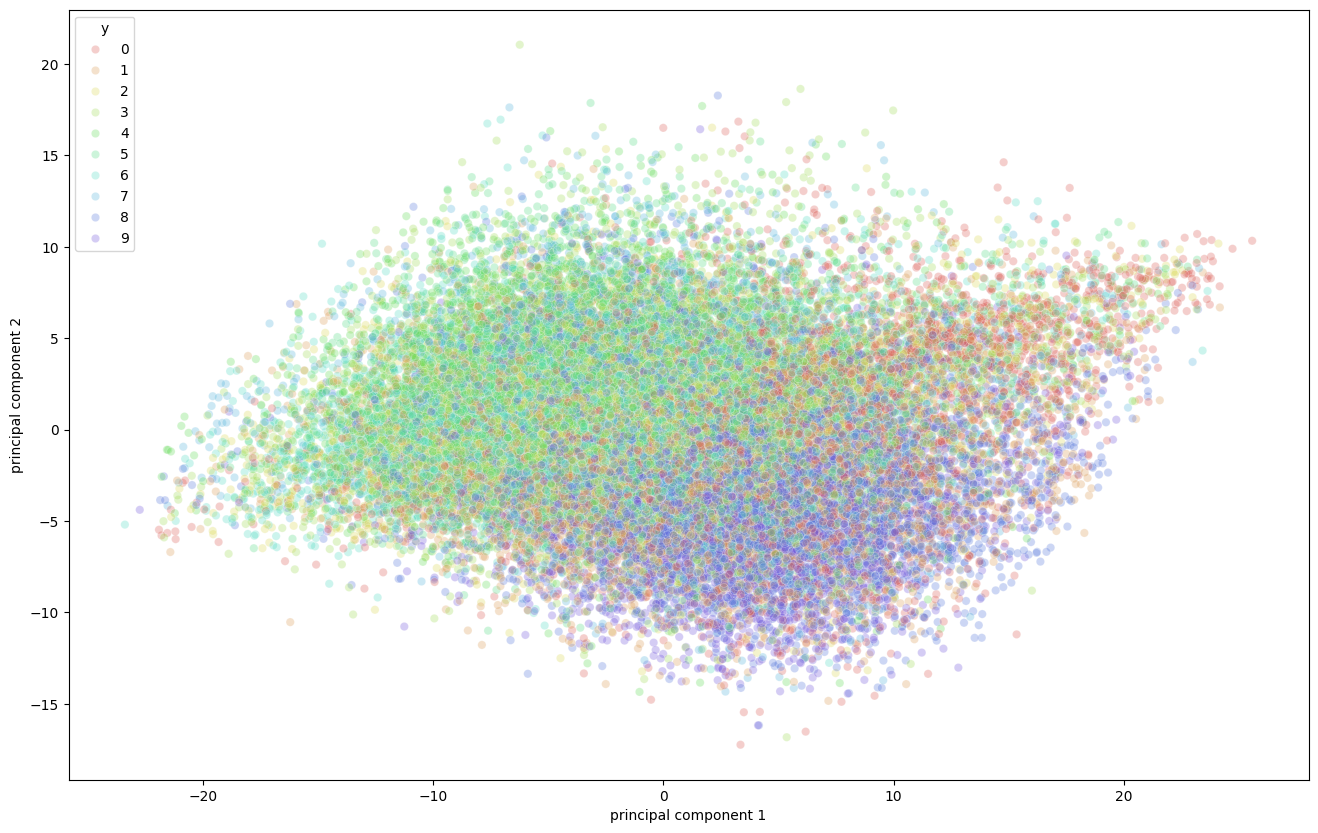

In [82]:
print("Grafico distribuizione valori di TRAIN")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 13),
    data=principal_cifar_Df_con_etichette,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di TEST



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

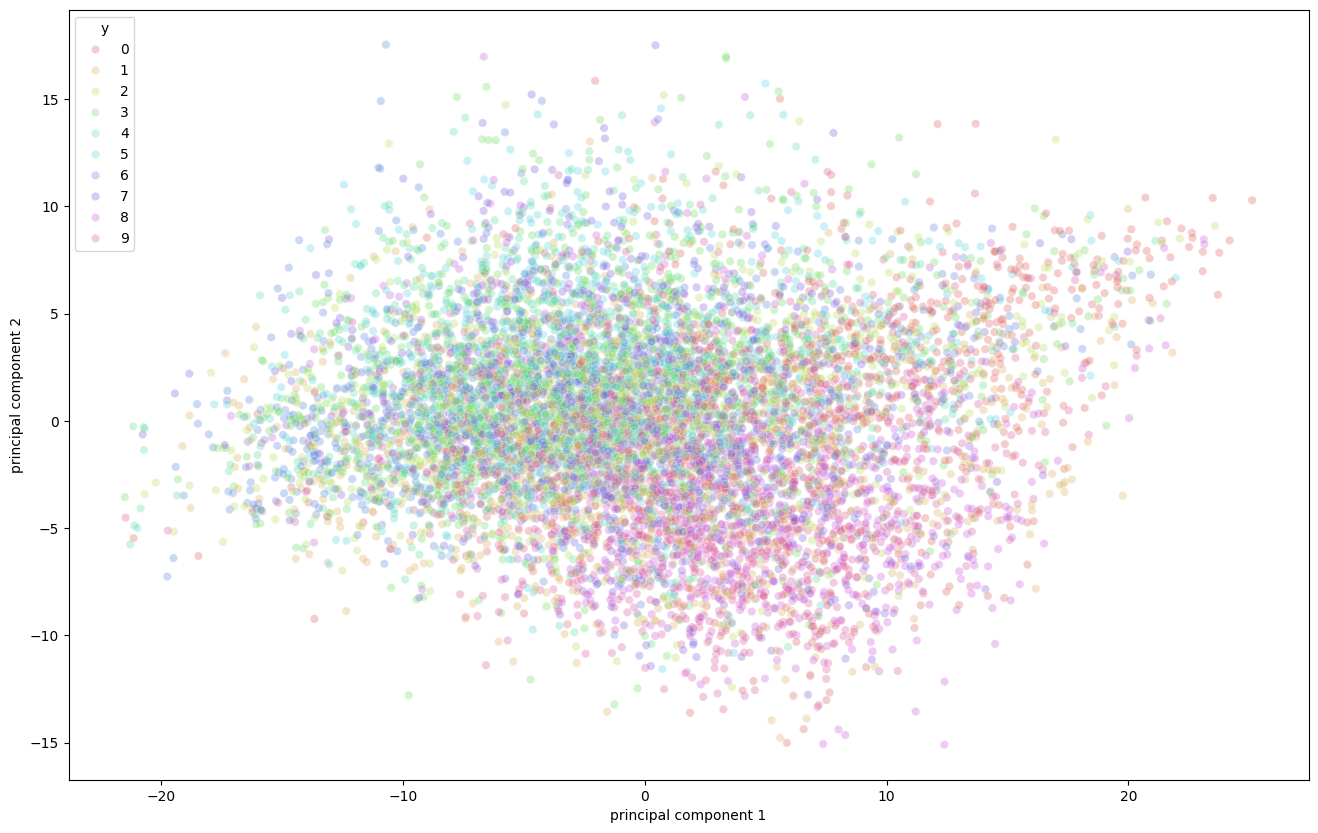

In [83]:
print("Grafico distribuizione valori di TEST")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df_con_etichette_test,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di val



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

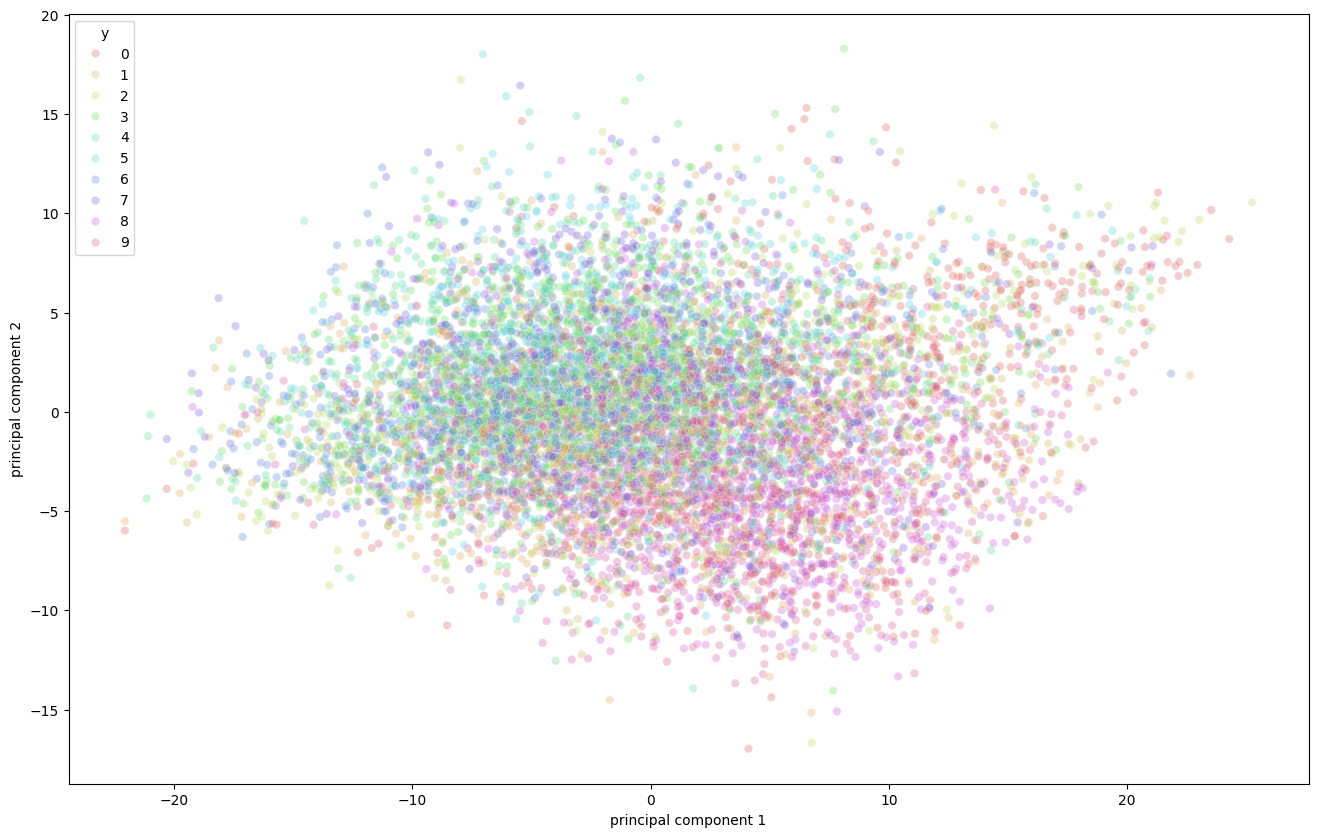

In [84]:
print("Grafico distribuizione valori di val")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df_con_etichette_val,
    legend="full",
    alpha=0.3
)

In [85]:
# Ora ho capito comme ridurre la dimensionalità del dataset posso fare operazioni di classificazione con SVM ?

In [86]:
# Tutti i dati sono ora memorizzati in una tabella dove ogni riga è un'elemento ed è composto dalle due caratteristiche che lo classificano e l'etichetta

# Print di servizio
print("RECAP DEI VALORI NEL DF : ")

print("")

print("Shape di principal_cifar_Df :" , principal_cifar_Df_con_etichette.shape)

print("")

print("Len di principal_cifar_DF : " , len(principal_cifar_Df_con_etichette))

print("")

# Stampa delle prime righe del DF
principal_cifar_Df_con_etichette.head()

RECAP DEI VALORI NEL DF : 

Shape di principal_cifar_Df : (40000, 3)

Len di principal_cifar_DF :  40000



principal component 1  principal component 2  y
0              -0.193170               0.813995  7
1               4.464829               7.191900  9
2               9.055642              -7.861840  1
3               7.298853               4.488400  6
4               7.721258              -2.615043  1

In [87]:
# Print di servizio
print("RECAP DEI VALORI NEL DF_test : ")

print("")

print("Shape di principal_cifar_Df_test :" , principal_cifar_Df_con_etichette_test.shape)

print("")

print("Len di principal_cifar_DF : " , len(principal_cifar_Df_con_etichette_test))

print("")

# Stampa delle prime righe del DF
principal_cifar_Df_con_etichette_test.head()

RECAP DEI VALORI NEL DF_test : 

Shape di principal_cifar_Df_test : (10000, 3)

Len di principal_cifar_DF :  10000



principal component 1  principal component 2  y
0              -3.694470               0.871664  3
1               9.688772              -9.690014  8
2               4.423447              -8.887115  8
3               7.755875              -3.889187  0
4              -5.463567               4.298652  6

In [88]:
# Print di servizio
print("RECAP DEI VALORI NEL DF_val : ")

print("")

print("Shape di principal_cifar_Df_val :" , principal_cifar_Df_con_etichette_val.shape)

print("")

print("Len di principal_cifar_DF : " , len(principal_cifar_Df_con_etichette_val))

print("")

# Stampa delle prime righe del DF
principal_cifar_Df_con_etichette_val.head()

RECAP DEI VALORI NEL DF_val : 

Shape di principal_cifar_Df_val : (10000, 3)

Len di principal_cifar_DF :  10000



principal component 1  principal component 2  y
0              -5.804840              -0.382156  6
1               4.501896               3.803146  7
2              -1.186239              -5.411752  3
3             -13.876060              -1.270103  6
4               6.226450              -8.770061  8

In [89]:
##################################################################################################################
### - PRIMA DI CONTINUARE DEVO SUDDIVIDERE IL DATASET IN MODO DA POTER CONFRONTARE SOLO DUE CLASSI PER VOLTA - ###
##################################################################################################################

In [90]:
# - Preparazione dei dataset filtrati

# Prova di divisione in due classi
primaEtichetta = 4
secondaEtichetta = 8

df_filtrato_etichettato = principal_cifar_Df_con_etichette[principal_cifar_Df_con_etichette['y'].isin([primaEtichetta,secondaEtichetta])]
df_filtrato_etichettato_test = principal_cifar_Df_con_etichette_test[principal_cifar_Df_con_etichette_test['y'].isin([primaEtichetta,secondaEtichetta])]
df_filtrato_etichettato_val = principal_cifar_Df_con_etichette_val[principal_cifar_Df_con_etichette_val['y'].isin([primaEtichetta,secondaEtichetta])]

In [91]:
print(df_filtrato_etichettato.shape)
print(df_filtrato_etichettato_test.shape)
print(df_filtrato_etichettato_val.shape)


(8015, 3)
(2000, 3)
(1985, 3)


In [92]:
# Divisione delle etichette solo con valore di y = 0 e 1
y_train_filtrato = y_train[np.isin(y_train, [primaEtichetta,secondaEtichetta])]
y_test_filtrato = y_test[np.isin(y_test, [primaEtichetta,secondaEtichetta])]
y_val_filtrato = y_val[np.isin(y_val, [primaEtichetta,secondaEtichetta])]

In [93]:
print(y_train_filtrato.shape)
print(y_test_filtrato.shape)
print(y_val_filtrato.shape)

(8015,)
(2000,)
(1985,)


In [94]:
# Eliminazione colonna etichette
df_filtrato = df_filtrato_etichettato.copy()
df_filtrato = df_filtrato.drop(columns=['y'])

# Eliminazione colonna etichette
df_filtrato_test = df_filtrato_etichettato_test.copy()
df_filtrato_test = df_filtrato_test.drop(columns=['y'])

# Eliminazione colonna etichette
df_filtrato_val = df_filtrato_etichettato_val.copy()
df_filtrato_val = df_filtrato_val.drop(columns=['y'])

In [95]:
print(df_filtrato.shape)
print(df_filtrato_test.shape)
print(df_filtrato_val.shape)

(8015, 2)
(2000, 2)
(1985, 2)


Grafico distribuizione valori di TRAIN_filtrato



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

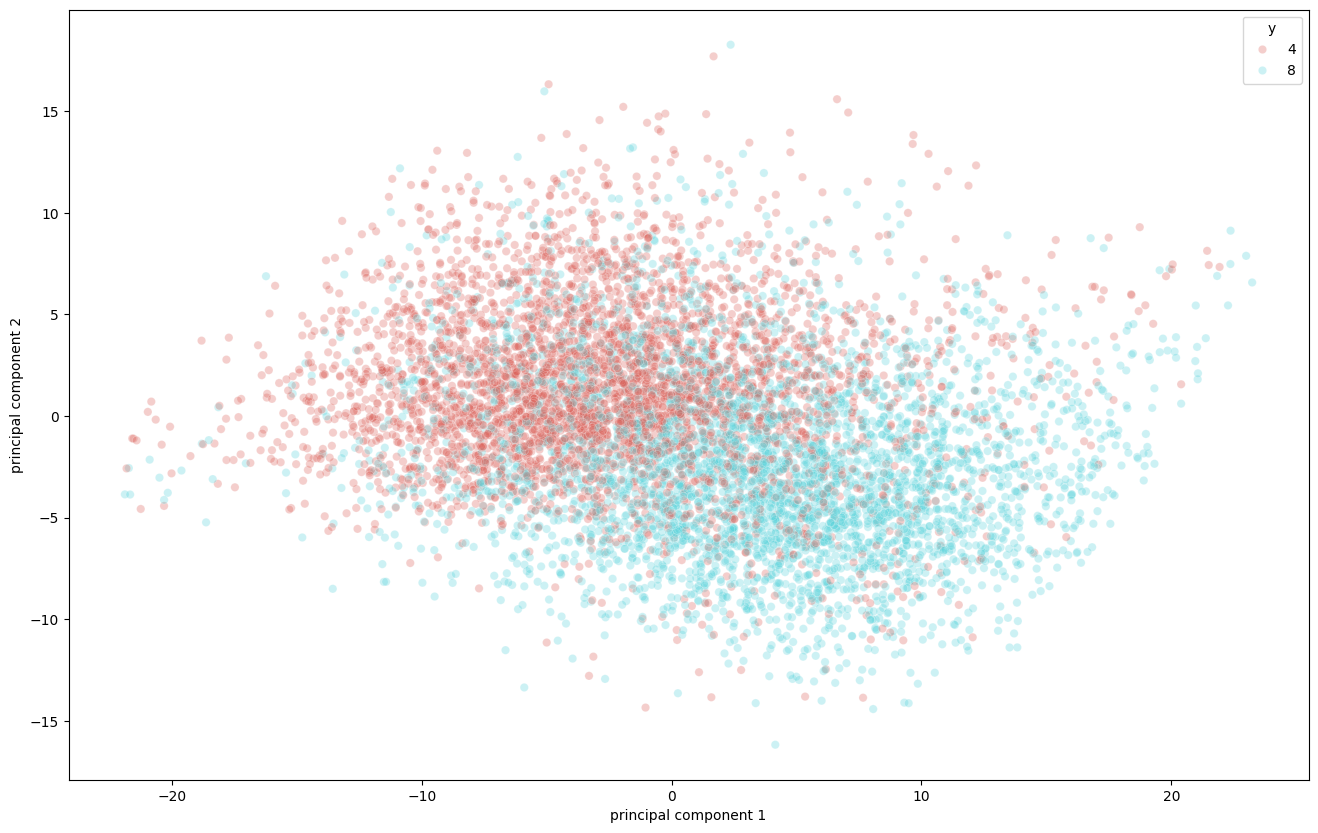

In [96]:
# Visualizzao schemi dei due DF ottenuti
print("Grafico distribuizione valori di TRAIN_filtrato")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_filtrato_etichettato,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di test_filtrato



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

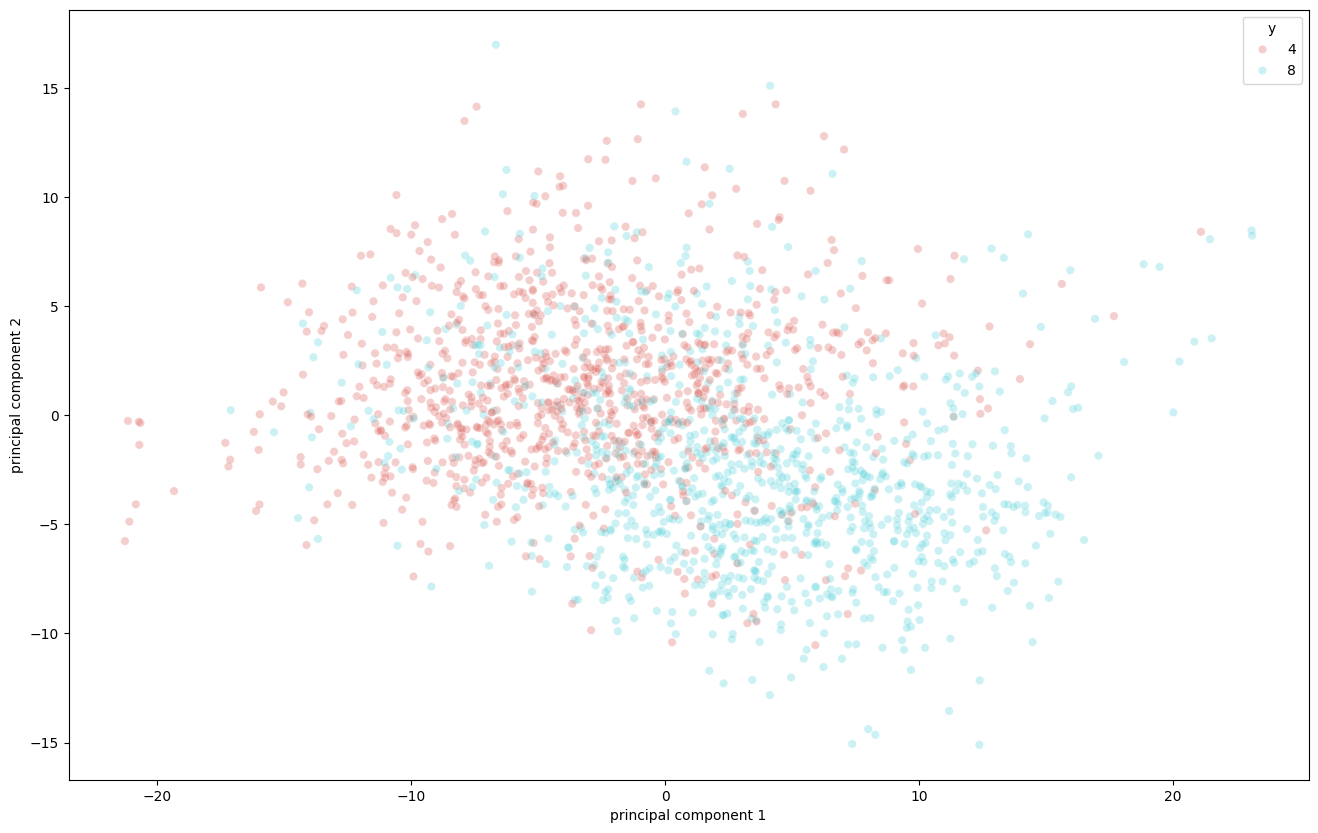

In [97]:
print("Grafico distribuizione valori di test_filtrato")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_filtrato_etichettato_test,
    legend="full",
    alpha=0.3
)

Grafico distribuizione valori di val_filtrato



<Axes: xlabel='principal component 1', ylabel='principal component 2'>

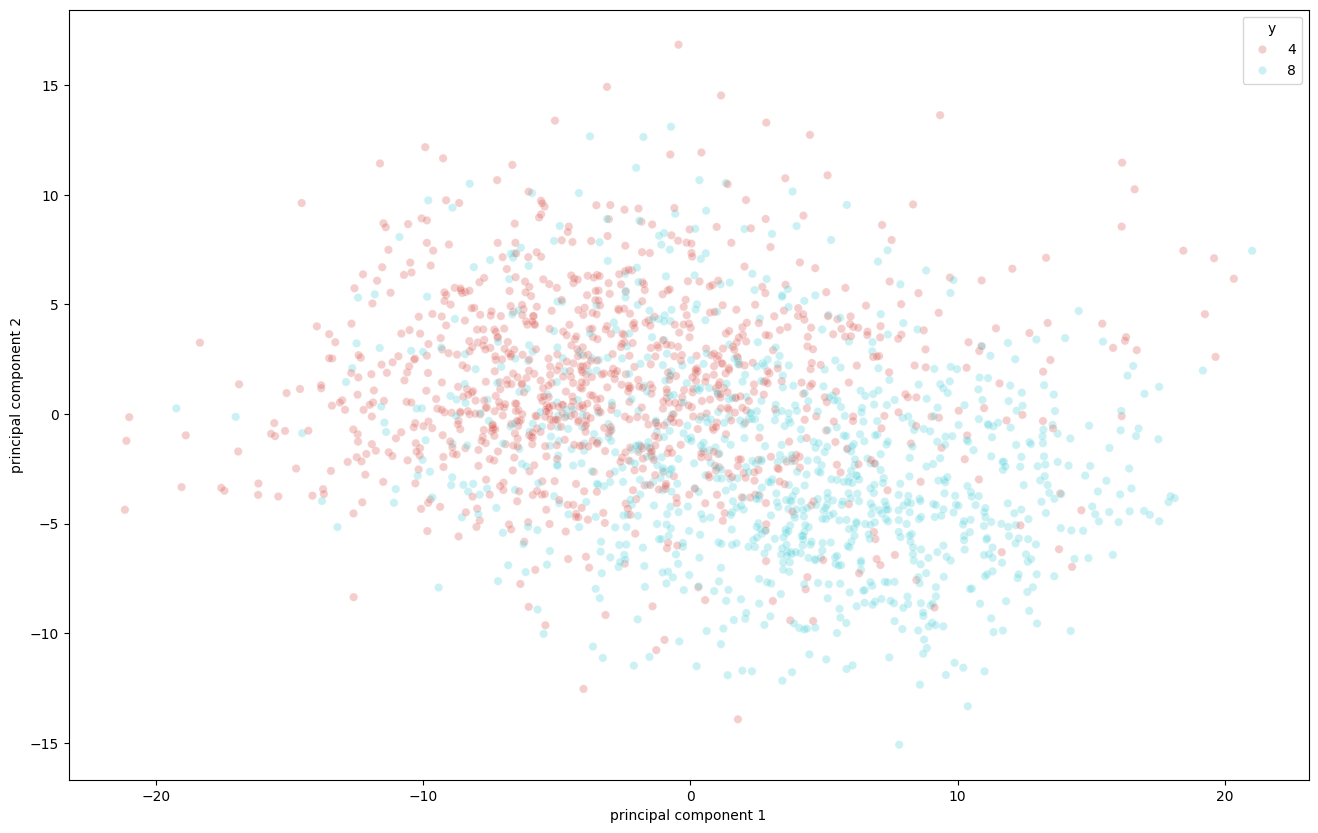

In [98]:
print("Grafico distribuizione valori di val_filtrato")

print("")

import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_filtrato_etichettato_val,
    legend="full",
    alpha=0.3
)

In [99]:
######################################
## - Preparazione pre allenamento - ##
######################################

pca = PCA(0.9)

pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,svd_solver='auto', tol=0.0, whiten=False)

print(pca.n_components_)

train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

print(train_img_pca.shape)
print(test_img_pca.shape)




99
(40000, 99)
(10000, 99)


In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

c:\Users\domen\Desktop\prova\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       102,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,810,698 (6.91 MB)

 Trainable params: 1,810,698 (6.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3478 - loss: 1.8278 - val_accuracy: 0.4610 - val_loss: 1.5333
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5076 - loss: 1.3894 - val_accuracy: 0.4931 - val_loss: 1.4313
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5821 - loss: 1.1752 - val_accuracy: 0.5410 - val_loss: 1.3181
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6424 - loss: 1.0002 - val_accuracy: 0.5356 - val_loss: 1.3612
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7082 - loss: 0.8243 - val_accuracy: 0.5391 - val_loss: 1.4426
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7715 - loss: 0.6459 - val_accuracy: 0.5262 - val_loss: 1.6095
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8285 - loss: 0.4888 - val_accuracy: 0.5525 - val_loss: 1.6881
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8752 - loss: 0.3557 - val_accu

In [107]:
print(principal_cifar_Df.shape)
print(principal_cifar_Df_test.shape)

(40000, 2)
(10000, 2)


In [113]:
# CLASSIFICAZIONE con Random Forest

# Train
# - ExtraTreesClassifier è una versione alternativa di RF dove viene introdotto un fattore di casualità che potrebbe migliorare i risultati che si ottengono
from sklearn.ensemble import ExtraTreesClassifier

# clf -> classifier
# - n_estimators -> numero di alberi decisionali utilizzati
# - - ho fatto varie prove partendo da 100, un numero minore di 9 porta a problemi nelle predizioni
# - random_state -> seme per il valore casuale che verrà utilizzato, utile a aumentare la riproducibilità dell'algoritmo
clf = ExtraTreesClassifier(n_estimators=10, random_state=19)
clf.fit(principal_cifar_Df, y_train)

# Test di RF
training_error_RF = 0
test_error = 0
training_error_RF = 1. - clf.score(principal_cifar_Df, y_train)
test_error = 1. - clf.score(principal_cifar_Df_test, y_test)

print ("RF training error: %f" % training_error_RF)
print ("RF test error: %f" % test_error)

RF training error: 0.000000
RF test error: 0.948800


In [ ]:
###################################################################################
### ORA alleno il modello nel distinguere con SVM solo i valori di classe 0 e 1 ###
###################################################################################

# - Inizio del lavoro con Support Vector Machine

# Import del modello di Support Vector Classifiers
from sklearn.svm import SVC

# Utilizzo di tuning automatico degli iperparametri tramite GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# METODO 1 - DIVISORE LINEARE

#############################################################################################
# - Ho inserito i dati di validazione per il training per testare con dataset più piccolo - #
#############################################################################################

# parameters for linear SVM
# - C è il parametro che regola fitting del modello, minore è meglio e meno adattato ai dati di training utilizzati
##parameters = {'C': [0.01,0.1,1,10,100,1000]}
parameters = {'C': [1000]}
linear_SVM = SVC(kernel='linear')

grid_linear=GridSearchCV(linear_SVM, parameters, cv=5)

# - Comando utile a trasformare le etichette nel formato desiderato
y_val_filtrato = y_val_filtrato.ravel()

# FITTING LINEAR KERNEL

grid_linear.fit(df_filtrato_val, y_val_filtrato)

print("Best score : " , grid_linear.best_score_)
print("Best parameters : " , grid_linear.best_params_)

In [ ]:
# METODO 2 - KERNEL POLINOMIALE

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.], 'degree':[2,3]}
poly2_SVM = SVC(kernel='poly')

grid_poly=GridSearchCV(poly2_SVM, parameters, cv=5)
grid_poly.fit(df_filtrato_val, y_val_filtrato)

print ('\nRESULTS FOR POLY DEGREE KERNEL\n')

print("Best parameters set found:")
print(grid_poly.best_params_)

print("\nScore with best parameters:")
print(grid_poly.best_score_)

In [ ]:
# - Inizio del lavoro con Support Vector Machine

# Import del modello di Support Vector Classifiers
##  from sklearn.svm import SVC

# Utilizzo di tuning automatico degli iperparametri tramite GridSearch
##  from sklearn.model_selection import GridSearchCV

# METODO 1

# parameters for linear SVM
# - C è il parametro che regola fitting del modello, minore è meglio e meno adattato ai dati di training utilizzati
##  parameters = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
##  linear_SVM = SVC(kernel='linear')

##  grid_linear=GridSearchCV(linear_SVM, parameters, cv=5)

# Tentativi vari di modifica delle dimensioni di y_train per fare si che andassero bene al SVM
#print(y_train.shape)
#y_train = y_train.reshape(-1,1)
#y_train = y_train.T
# - Comando utile a trasformare le etichette nel formato desiderato
##  y_train = y_train.ravel()
#print(y_train.shape)

#print(principal_cifar_Df.shape)
#print(principal_cifar_Df_con_etichette.shape)
#print(y_train.shape)

##grid_linear.fit(principal_cifar_Df, y_train)

##print("Best score : " , grid_linear.best_score_)
##print("Best parameters : " , grid_linear.best_params_)

# Sembra che SVM funzioni su dati di train trasformati in dataframe, devo convertire anche dati di test in DF per poter verificare il tutto

In [ ]:
# METODO 2 (Non finisce mai)

# parameters for poly with degree 2 kernel
#parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.], 'degree':[2,3]}
#poly2_SVM = SVC(kernel='poly')

#grid_poly=GridSearchCV(poly2_SVM, parameters, cv=5)
#grid_poly.fit(principal_cifar_Df, y_train)
#print ('\nRESULTS FOR POLY DEGREE KERNEL\n')

#print("Best parameters set found:")
#print(grid_poly.best_params_)

#print("\nScore with best parameters:")
#print(grid_poly.best_score_)



In [ ]:
# METODO 3 (Non finisce mai)

# parameters for rbf SVM

##  parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

##  rbf_SVM = SVC(kernel='rbf')

##  grid_rbf=GridSearchCV(rbf_SVM, parameters, cv=5)
##  grid_rbf.fit(principal_cifar_Df, y_train)
##  print ('\nRESULTS FOR rbf KERNEL\n')

##  print("Best parameters set found:")
##  print(grid_rbf.best_params_)

##  print("\nScore with best parameters:")
##  print(grid_rbf.best_score_)

In [ ]:
# Seleziona del metodo migliore individuato

#get training and test error for the best SVM model from CV
##  best_SVM = SVC(C=0.01, kernel='linear')

# Allenamento del modello selezionato come migliore
##  best_SVM.fit(principal_cifar_Df, y_train)

# Manipolazione etichette test x compatibilità con metodo
##  y_test = y_test.ravel()

# Calcolo dell'errore come differenza tra 1 e la percentuale sul totale degli errori commessi
# - Errore nel training
##  training_error = 1. - best_SVM.score(principal_cifar_Df, y_train)
# - Errore nel test
##  test_error = 1. - best_SVM.score(principal_cifar_Df_test, y_test)

##  print ("Best SVM training error: %f" % training_error)
##  print ("Best SVM test error: %f" % test_error)

In [ ]:
# Prove di predizione con SVM
##predizioneSVM_test = best_SVM.predict(principal_cifar_Df_test)

##  print("Risultati predizione su valori di test : ")
##  print(predizioneSVM_test)

##  print("")

##  print("Etichette reali dei dati di test : ")
##  print(y_test)

##  print("")

##  print("Eseguo ciclo per confrontare uno a uno tutti i valori predetti con i valori reali : ")
##  c = 0
##  for i in range(len(y_test)):
##      if(predizioneSVM_test[i] != y_test[i]):
##          print(" -> Errore in posizione : " , i)
##          c=1
##  if(c == 0):
##     print(" -> Nessun errore")

# Funziona ? (Sembra di si)

Risultati predizione su valori di test : 


NameError: name 'predizioneSVM_test' is not defined

In [ ]:
# Prova predizione con Random Forest
predizioneRF_test = clf.predict(principal_cifar_Df_test)

print("Risultati predizione su valori di test : ")
print(predizioneRF_test)

print("")

print("Etichette reali dei dati di test : ")
print(y_test)

print("")

print("Eseguo ciclo per confrontare uno a uno tutti i valori predetti con i valori reali : ")
c = 0
for i in range(len(y_test)):
    if(predizioneRF_test[i] != y_test[i]):
        print(" -> Errore in posizione : " , i)
        c=1
if(c == 0):
    print(" -> Nessun errore")

In [ ]:
# Confronto delle predizioni
confronto = predizioneSVM_test - predizioneRF_test

print(" - Differenze tra le previsioni - ")
print("Eseguo ciclo per confrontare uno a uno tutti i valori predetti con entrambi i metodi : ")
c = 0
for i in range(len(y_test)):
    if(predizioneRF_test[i] != predizioneSVM_test[i]):
        print(" -> Errore in posizione : " , i)
        c=1
if(c == 0):
    print(" -> Nessun errore")

